# Problem 1

![image.png](07hw1p.jpg)

![image.jpg](07hw2p.jpg)

## (f)

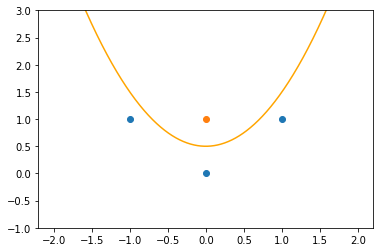

In [96]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[-1, 1, 1], [1, 1, 1], [0, 0, 0]])
y = np.array([0, 1, 0])

x1 = np.linspace(-2, 2, 1000)
x2 = pow(x1, 2) + 1/2

x1_point = [-1, 1, 0]
x2_point = [1, 1, 0]
plt.plot(x1, x2, 'orange')
plt.scatter(x1_point, x2_point)
plt.scatter(0, 1)
plt.ylim(-1, 3)
plt.show()

# Problem 2

In [74]:
import scipy.io as sio
from tqdm import tqdm
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, average_precision_score

In [3]:
mat_contents = sio.loadmat('07HW2_digit.mat')
train_data = np.array([mat_contents[key].astype(float) for key in mat_contents.keys() if key.startswith('train')])
test_data = np.array([mat_contents[key].astype(float) for key in mat_contents.keys() if key.startswith('test')])

In [4]:
def normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

train_data = normalize(train_data)
test_data = normalize(test_data)

In [5]:
Gammas = [2**i for i in range(-14, -5)]
Cs = [2**i for i in range(-5, 4)]

train_class = np.repeat(range(2), train_data[0].shape[0])
test_class = np.repeat(range(2), test_data[0].shape[0])
train = np.append(train_data[0, :], train_data[1, :], axis=0)
test = np.append(test_data[0, :], test_data[1, :], axis=0)

## (a)

In [76]:
acc_matrix = np.zeros((len(Gammas), len(Cs)))

for i, gamma in enumerate(Gammas):
    for j, C in enumerate(Cs):
        clf = svm.SVC(kernel='rbf', gamma=gamma, C=C)
        clf.fit(train, train_class)
        acc_matrix[i, j] = clf.score(test, test_class)

print(acc_matrix)

[[0.94  0.94  0.94  0.94  0.985 0.99  0.995 1.    1.   ]
 [0.94  0.94  0.94  0.985 0.99  0.995 1.    1.    1.   ]
 [0.94  0.94  0.985 0.99  0.995 1.    1.    1.    1.   ]
 [0.945 0.985 0.99  0.995 1.    1.    1.    1.    1.   ]
 [0.985 0.99  0.995 1.    1.    1.    1.    1.    1.   ]
 [0.99  0.995 1.    1.    1.    1.    1.    1.    1.   ]
 [0.995 1.    1.    1.    1.    1.    1.    1.    1.   ]
 [1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
 [1.    1.    1.    1.    1.    1.    1.    1.    1.   ]]


The best piar of gamma and C is a lot, so I choose $gamma=2^{-6}$ and $C=2^3$

## (b)

In [77]:
acc_matrix = np.zeros((len(Gammas), len(Cs)))

for i, gamma in enumerate(Gammas):
    for j, C in enumerate(Cs):
        clf = svm.SVC(kernel='linear', gamma=gamma, C=C)
        clf.fit(train, train_class)
        acc_matrix[i, j] = clf.score(test, test_class)

print(acc_matrix)

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [79]:
for d in range(1, 4):
    acc_matrix = np.zeros((len(Gammas), len(Cs)))
    for i, gamma in enumerate(Gammas):
        for j, C in enumerate(Cs):
            clf = svm.SVC(kernel='poly', gamma=gamma, C=C, degree=d)
            clf.fit(train, train_class)
            acc_matrix[i, j] = clf.score(test, test_class)

    print(f'Degeree {d}')
    print(acc_matrix)

Degeree 1
[[0.94  0.94  0.94  0.94  0.94  0.985 0.99  0.995 1.   ]
 [0.94  0.94  0.94  0.94  0.985 0.99  0.995 1.    1.   ]
 [0.94  0.94  0.94  0.985 0.99  0.995 1.    1.    1.   ]
 [0.94  0.94  0.985 0.99  0.995 1.    1.    1.    1.   ]
 [0.94  0.985 0.99  0.995 1.    1.    1.    1.    1.   ]
 [0.985 0.99  0.995 1.    1.    1.    1.    1.    1.   ]
 [0.99  0.995 1.    1.    1.    1.    1.    1.    1.   ]
 [0.995 1.    1.    1.    1.    1.    1.    1.    1.   ]
 [1.    1.    1.    1.    1.    1.    1.    1.    1.   ]]
Degeree 2
[[0.575 0.575 0.575 0.575 0.575 0.575 0.575 0.575 0.575]
 [0.575 0.575 0.575 0.575 0.575 0.575 0.575 0.575 0.575]
 [0.575 0.575 0.575 0.575 0.575 0.575 0.575 0.575 0.69 ]
 [0.575 0.575 0.575 0.575 0.575 0.575 0.69  0.84  0.92 ]
 [0.575 0.575 0.575 0.575 0.69  0.84  0.92  0.955 0.99 ]
 [0.575 0.575 0.69  0.84  0.92  0.955 0.99  0.99  0.995]
 [0.69  0.84  0.92  0.955 0.99  0.99  0.995 1.    1.   ]
 [0.92  0.955 0.99  0.99  0.995 1.    1.    1.    1.   ]
 [0.99  0.

To use a linear kernel, the accuraies are all 100%.

With polynomial kernels, the higher the degrees the lower the accuracy. Therefore, I would like to choose Degree1 kernel. Not only is the accuracy, but also it has less computational cost. The pairs of gamma and C are $gamma=2^{-14}$ and $C=2^3$

## (c)

In [68]:
def prepare_data(data, target_class):
    other_classes = [i for i in range(10) if i != target_class]

    # Get data for the target class
    target_data = data[target_class]

    # Get data for the other classes
    other_data = data[other_classes].reshape(-1, data.shape[2])

    # Create class labels for target and others
    target_labels = np.ones(target_data.shape[0])  # Labels for target class (1)
    other_labels = np.ones(other_data.shape[0], dtype=np.uint8)*-1   # Labels for other classes (0)

    # Combine target and other data, and their respective labels
    class_data = np.concatenate((target_data, other_data), axis=0)
    class_labels = np.concatenate((target_labels, other_labels), axis=0)

    class_data = normalize(class_data)

    return class_data, class_labels


def train_svm(train, train_class, test, test_class, gamma, C, kernel='rbf', degree=3):
    if kernel == 'poly':
        clf = svm.SVC(kernel=kernel, gamma=gamma, C=C, degree=degree)
    else:
        clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)

    clf.fit(train, train_class)
    
    # Calculate predictions on test data
    predictions = clf.predict(test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(test_class, predictions)
    ap = average_precision_score(test_class, predictions)
    precision = precision_score(test_class, predictions, zero_division=0)
    f1 = f1_score(test_class, predictions, zero_division=0)
    recall = recall_score(test_class, predictions, zero_division=0)

    return accuracy, f1, recall, precision, ap

### RBF

In [71]:
Gammas = [2**i for i in range(-14, -5)]
Cs = [2**i for i in range(-5, 4)]

best_ap = 0
best_acc = 0
best_f1 = 0
best_recall = 0
best_precision = 0

best_gamma = 0
best_C = 0

for gamma in tqdm(Gammas):
    for C in Cs:
        acc, f1, recall, precision, ap = [0]*10, [0]*10, [0]*10, [0]*10, [0]*10
        for target_class in range(10):
            train, train_class = prepare_data(train_data, target_class)
            test, test_class = prepare_data(test_data, target_class)

            acc[target_class], f1[target_class], recall[target_class], precision[target_class], ap[target_class] = \
                train_svm(train, train_class, test, test_class, gamma, C, kernel='rbf')

        ap = np.mean(ap)
        if ap > best_ap:
            best_ap = ap
            best_acc = np.mean(acc)
            best_f1 = np.mean(f1)
            best_recall = np.mean(recall)
            best_precision = np.mean(precision)
            best_gamma = gamma
            best_C = C

print(f'Best mAP: {best_ap}')
print(f'Best accuracy: {best_acc}')
print(f'Best precision: {best_precision}')
print(f'Best recall: {best_recall}')
print(f'Best f1: {best_f1}')
print(f'Best gamma: {best_gamma}')
print(f'Best C: {best_C}')

Best mAP: 0.8976153307855922
Best accuracy: 0.9888
Best precision: 0.9663575403949783
Best recall: 0.9200000000000002
Best f1: 0.9423856767547008
Best gamma: 0.015625
Best C: 8


### Linear

In [79]:
Gammas = [2**i for i in range(-14, -5)]
Cs = [2**i for i in range(-5, 4)]

best_ap = 0
best_acc = 0
best_f1 = 0
best_recall = 0
best_precision = 0

best_gamma = 0
best_C = 0

for gamma in tqdm(Gammas):
    for C in Cs:
        acc, f1, recall, precision, ap = [0]*10, [0]*10, [0]*10, [0]*10, [0]*10
        for target_class in range(10):
            train, train_class = prepare_data(train_data, target_class)
            test, test_class = prepare_data(test_data, target_class)

            acc[target_class], f1[target_class], recall[target_class], precision[target_class], ap[target_class] = \
                train_svm(train, train_class, test, test_class, gamma, C, kernel='linear')

        ap = np.mean(ap)
        if ap > best_ap:
            best_ap = ap
            best_acc = np.mean(acc)
            best_f1 = np.mean(f1)
            best_recall = np.mean(recall)
            best_precision = np.mean(precision)
            best_gamma = gamma
            best_C = C

print(f'Best mAP: {best_ap}')
print(f'Best accuracy: {best_acc}')
print(f'Best precision: {best_precision}')
print(f'Best recall: {best_recall}')
print(f'Best f1: {best_f1}')
print(f'Best gamma: {best_gamma}')
print(f'Best C: {best_C}')

100%|██████████| 9/9 [16:07<00:00, 107.50s/it]

Best mAP: 0.7786100549992834
Best accuracy: 0.9753000000000001
Best precision: 0.9169169846353811
Best recall: 0.827
Best f1: 0.8687618854637064
Best gamma: 6.103515625e-05
Best C: 0.0625


### Poly

In [80]:
Gammas = [2**i for i in range(-14, -5)]
Cs = [2**i for i in range(-5, 4)]

best_ap = 0
best_acc = 0
best_f1 = 0
best_recall = 0
best_precision = 0

best_gamma = 0
best_C = 0

for d in range(2, 5):
    for gamma in tqdm(Gammas):
        for C in Cs:
            acc, f1, recall, precision, ap = [0]*10, [0]*10, [0]*10, [0]*10, [0]*10
            for target_class in range(10):
                train, train_class = prepare_data(train_data, target_class)
                test, test_class = prepare_data(test_data, target_class)

                acc[target_class], f1[target_class], recall[target_class], precision[target_class], ap[target_class] = \
                    train_svm(train, train_class, test, test_class, gamma, C, kernel='poly', degree=d)

            ap = np.mean(ap)
            if ap > best_ap:
                best_ap = ap
                best_acc = np.mean(acc)
                best_f1 = np.mean(f1)
                best_recall = np.mean(recall)
                best_precision = np.mean(precision)
                best_gamma = gamma
                best_C = C

    print(f'Degree {d}')
    print(f'Best mAP: {best_ap}')
    print(f'Best accuracy: {best_acc}')
    print(f'Best precision: {best_precision}')
    print(f'Best recall: {best_recall}')
    print(f'Best f1: {best_f1}')
    print(f'Best gamma: {best_gamma}')
    print(f'Best C: {best_C}')

100%|██████████| 9/9 [27:50<00:00, 185.61s/it]


Degree 2
Best mAP: 0.8847781065867253
Best accuracy: 0.9873999999999998
Best precision: 0.9550824520804057
Best recall: 0.917
Best f1: 0.9355260790930702
Best gamma: 0.015625
Best C: 8


100%|██████████| 9/9 [28:54<00:00, 192.77s/it]


Degree 3
Best mAP: 0.8847781065867253
Best accuracy: 0.9873999999999998
Best precision: 0.9550824520804057
Best recall: 0.917
Best f1: 0.9355260790930702
Best gamma: 0.015625
Best C: 8


100%|██████████| 9/9 [29:33<00:00, 197.06s/it]

Degree 4
Best mAP: 0.8847781065867253
Best accuracy: 0.9873999999999998
Best precision: 0.9550824520804057
Best recall: 0.917
Best f1: 0.9355260790930702
Best gamma: 0.015625
Best C: 8


### Strategy

I used one by others method. In other words, I choose a number which I want to classify, and I other as the same type. By doing so, I can reamain SVM as a two classes classification task. Then I will repeat the process for 10 numbers, and will calculate the mean value of their respective accuracy. So I can get a model to classify the 10 numbers!


### Final Result

#### Kernel: rbf <br>
Best mAP: 0.8976153307855922<br>
Best accuracy: 0.9888<br>
Best precision: 0.9663575403949783<br>
Best recall: 0.9200000000000002<br>
Best f1: 0.9423856767547008<br>
Best gamma: 0.015625<br>
Best C: 8<br>

#### Kernel: linear<br>
Best mAP: 0.7786100549992834<br>
Best accuracy: 0.9753000000000001<br>
Best precision: 0.9169169846353811<br>
Best recall: 0.827<br>
Best f1: 0.8687618854637064<br>
Best gamma: 6.103515625e-05<br>
Best C: 0.0625<br>

#### Kernel: poly<br>
Degree 2<br>
Best mAP: 0.8847781065867253<br>
Best accuracy: 0.9873999999999998<br>
Best precision: 0.9550824520804057<br>
Best recall: 0.917<br>
Best f1: 0.9355260790930702<br>
Best gamma: 0.015625<br>
Best C: 8<br>

Degree 3<br>
Best mAP: 0.8847781065867253<br>
Best accuracy: 0.9873999999999998<br>
Best precision: 0.9550824520804057<br>
Best recall: 0.917<br>
Best f1: 0.9355260790930702<br>
Best gamma: 0.015625<br>
Best C: 8<br>

Degree 4<br>
Best mAP: 0.8847781065867253<br>
Best accuracy: 0.9873999999999998<br>
Best precision: 0.9550824520804057<br>
Best recall: 0.917<br>
Best f1: 0.9355260790930702<br>
Best gamma: 0.015625<br>
Best C: 8<br>

#### Discussion

By comparing the mAP with different kernels, the **rbf** has the best performance. However the result might not be the best because the method we find the gamma and C is not precise. If we want to find the best gamma and C, we can train the model with gradient decent to find a piar of gamma and C where is minima.